In [90]:
# std lib
from getpass import getpass

# 3rd party
import numpy as np
import pylab as plt
from astropy import stats, units as u
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from matplotlib.ticker import MaxNLocator
%matplotlib inline

# Data Lab
from dl import authClient as ac, queryClient as qc #, storeClient as sc
from dl.helpers.utils import convert

In [65]:
# here we can use the 'anonymous' user name, and an empty password
token = ac.login(input('Enter user name (+ENTER): '),getpass('Enter password (+ENTER): '))

Enter user name (+ENTER):  schuttz
Enter password (+ENTER):  ···············


In [71]:
print(qc.schema('nsc_dr2'))


Schema: nsc_dr2

      Table Name   Description
      ----------   -----------
            chip   CCD information table
        coverage   Survey coverage table
        exposure   Exposures contributing to the catalog
            meas   Primary measurements table
          object   Primary object table



In [67]:
print(qc.schema('nsc_dr2.object'))


Schema: nsc_dr2
 Table: object

     Column Name   Description
     -----------   -----------
              ra   Right ascension (J2000.0) of object, in degrees
             dec   Declination (J2000.0) of object, in degrees
            glon   Galactic Longitude
            glat   Galactic Latitude
            elon   Ecliptic Longitude
            elat   Ecliptic Latitude
           raerr   Uncertainty of RA
          decerr   Uncertainty in DEC
            pmra   Proper motion in RA*cos(DEC)
           pmdec   Proper motion in DEC
         pmraerr   Uncertainty in PMRA
        pmdecerr   Uncertainty in PMDEC
             mjd   Mean Modified Julian Date
        deltamjd   Range of Modified Julian Date
            umag   Weighted-average u-band magnitude
            urms   RMS scatter in u from multiple measurements of this object
            uerr   Uncertainty in mean u-band magnitude
          uasemi   u-band profile RMS along major axis, in arcseconds
          ubsemi   u-band profil

In [78]:
query1 = """
SELECT madvar,ndetg,ndeti,ndetr,ndetu,ndetvr,ndety,ndetz,id
FROM nsc_dr2.object
WHERE class_star<0.2 and fwhm>2 and variable10sig=1 and ndet>50
limit 100000
"""

print(query1)


SELECT madvar,ndetg,ndeti,ndetr,ndetu,ndetvr,ndety,ndetz,id
FROM nsc_dr2.object
WHERE class_star<0.2 and fwhm>2 and variable10sig=1 and ndet>50
limit 100000



In [79]:
%%time
result1 = qc.query(sql=query1)

CPU times: user 90.2 ms, sys: 18.3 ms, total: 108 ms
Wall time: 8.15 s


In [124]:
df1 = convert(result1,'pandas')
print(df1.shape)
df1.head(30)

(100000, 9)


,madvar,ndetg,ndeti,ndetr,ndetu,ndetvr,ndety,ndetz,id
0,0.067356,14,19,19,8,0,3,10,149714_1161
1,0.162159,49,0,3,0,0,0,3,19245_2883
2,0.524064,16,19,20,3,0,0,0,149201_5432
3,0.150981,17,22,30,0,0,27,20,149201_2152
4,1.057640,14,18,19,7,2,0,1,148688_13646
5,0.281812,13,19,24,3,2,2,5,148688_6201
6,0.171753,16,21,19,12,0,2,13,148688_6936
7,0.219424,2,19,18,0,0,15,16,149201_490
8,0.323435,7,4,1,13,0,27,4,149201_330
9,0.061638,15,16,26,14,0,21,17,149713_228


In [128]:
testID = '148688_6013'

query2 = """
SELECT ra,dec,mjd,mag_aper2,magerr_aper2,filter
FROM nsc_dr2.meas
WHERE objectid='{:s}'
ORDER by mjd ASC
""".format(testID)

print(query2)


SELECT ra,dec,mjd,mag_aper2,magerr_aper2,filter
FROM nsc_dr2.meas
WHERE objectid='148688_6013'
ORDER by mjd ASC



In [129]:
%%time
result2 = qc.query(sql=query2)

CPU times: user 24.6 ms, sys: 5.35 ms, total: 29.9 ms
Wall time: 263 ms


In [130]:
df2 = convert(result2,'pandas')
print(df2.shape)
df2.head(20)

(54, 6)


,ra,dec,mjd,mag_aper2,magerr_aper2,filter
0,326.808715,-30.702442,56456.370343,22.0234,0.073995,i
1,326.808778,-30.702441,56456.371363,21.7625,0.025651,i
2,326.808778,-30.702456,56456.374722,21.7003,0.025428,i
3,326.808804,-30.702433,56456.381427,21.8561,0.027385,i
4,326.808769,-30.702442,56456.384776,21.8309,0.026569,i
5,326.808813,-30.702430,56456.388168,21.9138,0.029098,i
6,326.808780,-30.702445,56456.394875,21.8255,0.025637,i
7,326.808765,-30.702443,56456.398235,21.9425,0.028981,i
8,326.808809,-30.702440,56457.378666,21.8903,0.042014,i
9,326.808789,-30.702439,56457.381908,21.9054,0.035991,i


In [131]:
def plot_scatter(x,y,ax=None):
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(5,5))
    
    # apply units
    x = (x*u.deg).to('arcsec')
    y = (y*u.deg).to('arcsec')
    
    ax.plot(x-np.median(x),y-np.median(y),'bo',ms=3,alpha=0.6)
    ax.set_xlabel('RA offset ({:s})'.format(x.unit))
    ax.set_ylabel('DEC offset ({:s})'.format(y.unit))
    ax.axvline(0,c='0.5',lw=1)
    ax.axhline(0,c='0.5',lw=1)

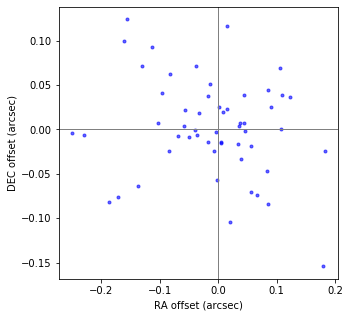

In [132]:
plot_scatter(df2['ra'].values,df2['dec'].values)

In [106]:
# define a function to select only measurements in one band
def get_data(df,band='g'):
    sel = (df['filter'] == band)    
    t = df['mjd'][sel].values
    y = df['mag_aper2'][sel].values
    dy = df['magerr_aper2'][sel].values
    return t,y,dy # return time, magnitudes in one band, uncertainties

In [114]:
# a reusable function to plot the lightcurve
def plot_raw_lightcurve(t,y,dy,title='',ax=None,lperc=0,rperc=90):
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(10,7))
    
    jd0 = t.min() # modified Julian date offset
    t = t-jd0 # first date of observations = 0
    
    axins = inset_axes(ax, 3.5, 1.3, loc=9) # make inset axes object
    
    left = np.percentile(t,lperc)
    right = np.percentile(t,rperc)
    ax.errorbar(t,y,yerr=dy,marker='.',ms=8,ls='none',color='g',lw=1,alpha=0.5,label='')
    axins.errorbar(t,y,yerr=dy,marker='.',ms=8,ls='none',color='g',lw=1,alpha=0.5,label='')
    axins.set_xlim(0.9999*left,1.0001*right)
    axins.xaxis.set_major_locator(MaxNLocator(4))

    # Main panel chores
    ax.set_xlabel('modified Julian date - {:g} (days)'.format(jd0))
    ax.set_ylabel('magnitude')
    ax.invert_yaxis()
    ax.set_title(title)
    #ax.legend(loc='lower left',frameon=True,ncol=1,markerscale=1.5)

    # draw bbox around inset; connect with parent axes
    mark_inset(ax, axins, loc1=1, loc2=4, fc="none", ec="0.5",lw=1,alpha=0.7);

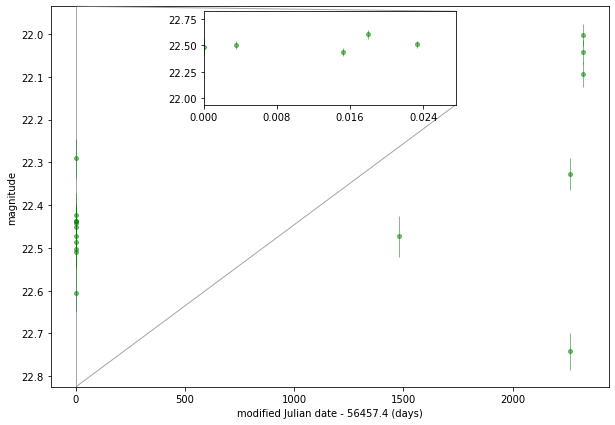

In [133]:
t,y,dy = get_data(df2,'r')
plot_raw_lightcurve(t,y,dy,title='',ax=None,lperc=0,rperc=30)

(56456, 56460)

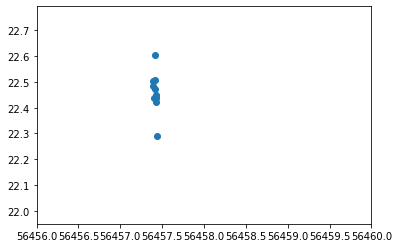

In [134]:
plt.scatter(t,y)
plt.xlim(56456,56460)